# Lib Import

In [1]:
import pickle
import pandas                   as pd
import numpy                    as np
from sklearn.metrics            import f1_score, precision_score, recall_score, precision_recall_fscore_support, accuracy_score
from xgboost                    import plot_importance
from sklearn.model_selection    import train_test_split
from xgboost                    import XGBClassifier
from sklearn.preprocessing      import MinMaxScaler, StandardScaler, RobustScaler

# 0.0 Data import

In [2]:
df0 = pd.read_csv("../data/base_modelo.csv", index_col="id")
df0.columns = df0.columns.str.lower()
test = df0[df0['safra']>=201407]
df0 = df0[df0['safra']<=201406]
print( df0.shape, test.shape )
df0.head(3)

(5454, 80) (5284, 80)


,safra,y,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78
id,,,,,,,,,,,,,,,,,,,,,
1,201404,0,0.0,0.0,0.0,0.0,124.54,3277.0,51.98,NaN,...,156.38,7.52,0.0,151.0,0.0,3.0,477.84,173.06,0.00,3.0
3,201405,0,99.0,2.0,2.0,2.0,80.38,1824.0,26.63,NaN,...,471.86,NaN,NaN,96.0,NaN,NaN,NaN,732.00,121.98,NaN
5,201403,1,0.0,0.0,0.0,0.0,70.46,437.0,40.69,10.99,...,NaN,NaN,0.0,75.0,0.0,0.0,914.45,NaN,NaN,0.0


# 1.0 Data Description

## 1.1 data types

In [3]:
df1 = df0.copy()

In [4]:
df1.dtypes.nunique()

2

In [5]:
df1.dtypes

safra       int64
y           int64
var_1     float64
var_2     float64
var_3     float64
           ...   
var_74    float64
var_75    float64
var_76    float64
var_77    float64
var_78    float64
Length: 80, dtype: object

## 1.2 null values

In [6]:
(df1.isnull().sum()/len(df1)).sort_values(ascending=False)

var_62    0.792079
var_70    0.784195
var_61    0.723322
var_49    0.694903
var_36    0.685552
            ...   
var_60    0.000000
var_57    0.000000
var_20    0.000000
var_32    0.000000
safra     0.000000
Length: 80, dtype: float64

## 1.3 data dimension

In [7]:
df1.shape

(5454, 80)

# 2.0 FEATURE ENGINEERING

In [8]:
df2 = df1.copy()

# 3.0 FEATURE FILTERING

In [9]:
df3 = df2.copy()

# 4.0 EDA

In [10]:
df4 = df3.copy()

In [11]:
df4['y'].mean()

0.27997799779978

In [12]:
df4['safra'].value_counts().sort_index()

201401    854
201402    898
201403    873
201404    955
201405    972
201406    902
Name: safra, dtype: int64

# 5.0 DATA PREPARATION

## 5.1 Split into train and test

In [13]:
df5 = df4.copy()
Xtrain, ytrain = df5.drop(['y'], axis=1) , df5['y']
Xtest, ytest = test.drop(['y'], axis=1) , test['y']

Xtrain5, Xtest5 = Xtrain.copy(), Xtest.copy()

In [14]:
minmax = MinMaxScaler()
Xtrain5.iloc[:,:] = minmax.fit_transform(Xtrain.values)
pickle.dump( minmax, open( f'../parameters/{minmax.__class__.__name__}_scaler.pkl', 'wb') )

minmax = pd.read_pickle(f"../parameters/{minmax.__class__.__name__}_scaler.pkl")
Xtest5.iloc[:,:] = minmax.transform(Xtest.values)

Xtrain5.head()

C:\Users\kosmo\AppData\Local\Temp\ipykernel_26020\435276150.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  Xtrain5.iloc[:,:] = minmax.fit_transform(Xtrain.values)
C:\Users\kosmo\AppData\Local\Temp\ipykernel_26020\435276150.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  Xtest5.iloc[:,:] = minmax.transform(Xtest.values)


,safra,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78
id,,,,,,,,,,,,,,,,,,,,,
1,0.6,0.000000,0.000000,0.000000,0.000000,0.161571,0.007693,0.066304,NaN,0.122807,...,0.038630,0.152165,0.0,0.067891,0.0,0.1875,0.055649,0.138679,0.000000,0.1875
3,0.8,0.475962,0.142857,0.181818,0.166667,0.103821,0.004330,0.033962,NaN,0.611702,...,0.121321,NaN,NaN,0.053248,NaN,NaN,NaN,0.212552,0.103907,NaN
5,0.4,0.000000,0.000000,0.000000,0.000000,0.090848,0.001120,0.051900,0.018195,0.649123,...,NaN,NaN,0.0,0.047657,0.0,0.0000,0.111482,NaN,NaN,0.0000
6,0.8,0.293269,0.000000,0.363636,0.083333,NaN,0.000433,0.050803,0.098757,0.087719,...,NaN,NaN,NaN,0.029020,NaN,NaN,NaN,NaN,NaN,NaN
7,0.6,0.245192,0.000000,0.000000,0.083333,NaN,0.000613,0.065666,0.094939,0.281902,...,NaN,NaN,NaN,0.029819,NaN,NaN,NaN,NaN,NaN,NaN


# 6.0 FEATURE SELECTION

In [15]:
Xtrain6 = Xtrain5.copy()
Xtest6 = Xtest5.copy()

# 7.0 Machine Learning Modeling

In [16]:
#model
xgbc = XGBClassifier( n_estimators=100, random_state=42, objective='binary:logistic').fit( Xtrain, ytrain )

ypred = xgbc.predict(Xtrain6)

precision_recall_fscore_support(ytrain, ypred)

(array([0.71965427, 0.26515152]),
 array([0.97529921, 0.02292076]),
 array([0.82819764, 0.04219409]),
 array([3927, 1527], dtype=int64))

In [17]:
ypred = xgbc.predict(Xtest6)

precision_recall_fscore_support(ytest, ypred)

(array([0.69424744, 0.23557692]),
 array([0.95682867, 0.03060587]),
 array([0.80465807, 0.05417358]),
 array([3683, 1601], dtype=int64))

<AxesSubplot: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

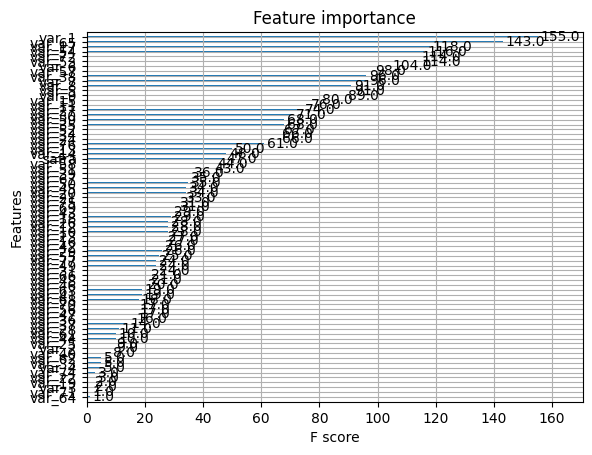

In [18]:
plot_importance(xgbc)

In [19]:
Xtrain6.head()

,safra,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78
id,,,,,,,,,,,,,,,,,,,,,
1,0.6,0.000000,0.000000,0.000000,0.000000,0.161571,0.007693,0.066304,NaN,0.122807,...,0.038630,0.152165,0.0,0.067891,0.0,0.1875,0.055649,0.138679,0.000000,0.1875
3,0.8,0.475962,0.142857,0.181818,0.166667,0.103821,0.004330,0.033962,NaN,0.611702,...,0.121321,NaN,NaN,0.053248,NaN,NaN,NaN,0.212552,0.103907,NaN
5,0.4,0.000000,0.000000,0.000000,0.000000,0.090848,0.001120,0.051900,0.018195,0.649123,...,NaN,NaN,0.0,0.047657,0.0,0.0000,0.111482,NaN,NaN,0.0000
6,0.8,0.293269,0.000000,0.363636,0.083333,NaN,0.000433,0.050803,0.098757,0.087719,...,NaN,NaN,NaN,0.029020,NaN,NaN,NaN,NaN,NaN,NaN
7,0.6,0.245192,0.000000,0.000000,0.083333,NaN,0.000613,0.065666,0.094939,0.281902,...,NaN,NaN,NaN,0.029819,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None, random_state=42)
models,predictions = clf.fit(Xtrain6, Xtest6, ytrain, ytest)

print(models)

100%|██████████| 29/29 [00:35<00:00,  1.24s/it]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
BernoulliNB                        0.68               0.64     0.64      0.68   
NearestCentroid                    0.71               0.63     0.63      0.70   
GaussianNB                         0.59               0.62     0.62      0.60   
QuadraticDiscriminantAnalysis      0.64               0.62     0.62      0.65   
LogisticRegression                 0.72               0.57     0.57      0.66   
Perceptron                         0.66               0.57     0.57      0.65   
LinearDiscriminantAnalysis         0.72               0.56     0.56      0.66   
XGBClassifier                      0.72               0.56     0.56      0.66   
LinearSVC                          0.72               0.56     0.56      0.66   
LGBMClassifier                     0.72               0.56     0.56      0.65   
CalibratedClassifierCV      

# 8.0 Hyperparameter Tuning

# 9.0 Deploy to Production